In [48]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models

## Loading Data

In [49]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
print("shape of x_train data: ",x_train.shape)
print("shape of x_test data: ",x_test.shape)
print("shape of y_train data: ",y_train.shape)
print("shape of y_test data: ",y_test.shape)

shape of x_train data:  (60000, 28, 28)
shape of x_test data:  (10000, 28, 28)
shape of y_train data:  (60000,)
shape of y_test data:  (10000,)


* here we are reshaping the data  because the first Convolution expects a single tensor containing everything
* So we are providing model a 4D tensor of 60000x28x28x1 items in a list and same for test images
* we are also normalizing the x_train and x_test

In [50]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test/255.0
print("shape of x_train data: ",x_train.shape)
print("shape of x_test data: ",x_test.shape)
print("shape of y_train data: ",y_train.shape)
print("shape of y_test data: ",y_test.shape)

shape of x_train data:  (60000, 28, 28, 1)
shape of x_test data:  (10000, 28, 28, 1)
shape of y_train data:  (60000,)
shape of y_test data:  (10000,)


## Defining the Model
* the code is self explanatory

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
  ]
)

## Compiling the model and training it

In [46]:
model.compile(optimizer ="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print("test loss:",test_loss)
print("test accuracy:",test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1938 - accuracy: 0.9394
Epoch 2/5
1875/1875 [==============================] - 98s 53ms/step - loss: 0.0675 - accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0499 - accuracy: 0.9847
Epoch 4/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0386 - accuracy: 0.9886
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.0611 - accuracy: 0.9816
test loss: 0.06109409034252167
test accuracy: 0.9815999865531921


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

## Visualizing the convolutions and Pooling


In [26]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


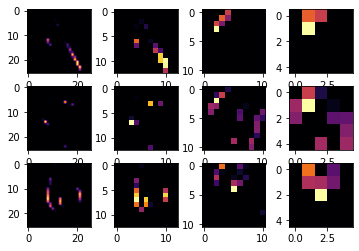

In [44]:
f ,axarr = plt.subplots(3,4)
first_image = 7
next_image = 16
next2_image =100
conv_no =1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input,outputs=layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[first_image].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, conv_no], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[next_image].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, conv_no], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[next2_image].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, conv_no], cmap='inferno')
  axarr[2,x].grid(False)

## Experimenting with convolutions
* changing number of filters
* adding more conv2d and mxpooling layers 
* increasing epochs

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
  ]
)
model.compile(optimizer ="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print("test loss:",test_loss)
print("test accuracy:",test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1984 - accuracy: 0.9383
Epoch 2/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0697 - accuracy: 0.9784
Epoch 3/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0503 - accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0389 - accuracy: 0.9877
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.0530 - accuracy: 0.9849
test loss: 0.053029194474220276
test accuracy: 0.9848999977111816
